In [124]:
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
import pandas as pd
import numpy as np
import seaborn as sns
from collections import Counter
from sklearn.utils import shuffle
import matplotlib.patches as mpatches
from scipy.spatial import distance
from sklearn.model_selection import train_test_split
from matplotlib.colors import ListedColormap
from matplotlib.lines import Line2D

# KNN no dataset Iris

In [2]:
# Carregando o dataset Iris
iris = load_iris()
X = iris.data
y = iris.target
features = iris.feature_names
target_names = iris.target_names

# Convertendo para DataFrame para facilitar a manipulação
iris_df = pd.DataFrame(X, columns=features)
iris_df['species'] = [target_names[i] for i in y]
iris_df


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


- **Número de Instâncias**: O dataset contém um total de 150 instâncias, divididas igualmente entre três espécies de flores de íris: *Iris setosa*, *Iris versicolor*, e *Iris virginica*. Cada espécie tem 50 amostras.

- **Número de Atributos**: Existem quatro atributos: *sepal length*, *sepal width*, *petal length*, e *petal width*.

- **Objetivo**: O objetivo é classificar as flores de íris em uma das três classes com base nas quatro características fornecidas.

# Definição e fundamentos do algoritmo KNN

- **KNN (K-Nearest Neighbors)** O KNN funciona com base em um princípio simples: objetos semelhantes estão frequentemente próximos uns dos outros. Ou seja, ele assume que as instâncias de dados que estão perto umas das outras no espaço de recurso têm rótulos semelhantes. Quando usado para classificação, o KNN atribui a um ponto de dados a classe mais comum entre seus k vizinhos mais próximos. K é um número inteiro positivo, geralmente pequeno. Quando K=1, o algoritmo é conhecido como o algoritmo do vizinho mais próximo, onde a classe de um ponto é simplesmente a classe de seu vizinho mais próximo.

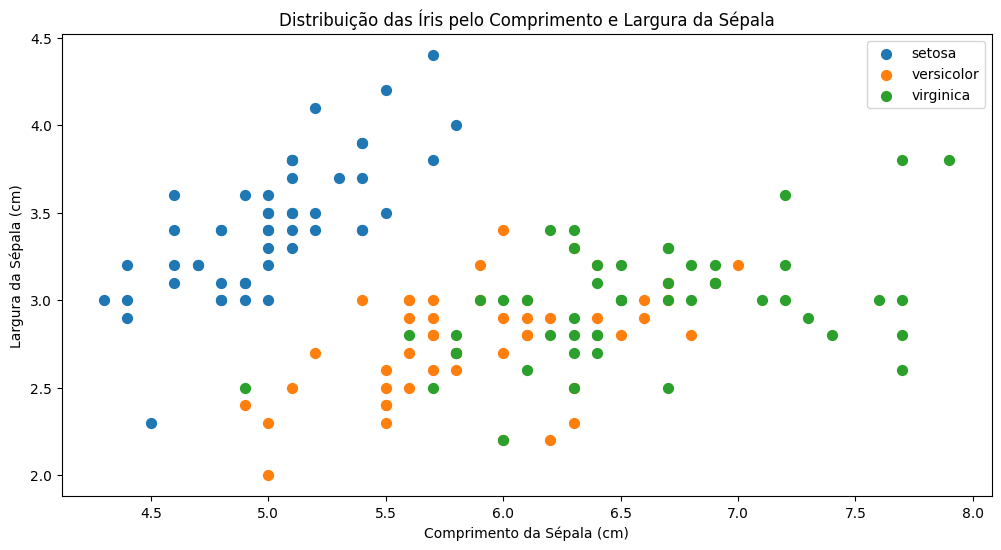

In [3]:
plt.figure(figsize=(12, 6))

# Scatter plot para cada espécie
for i, species in enumerate(target_names):
    # Selecionar apenas dados dessa espécie
    species_data = iris_df[iris_df['species'] == species]
    
    plt.scatter(species_data['sepal length (cm)'], # usando apenas as informações da sépala
                species_data['sepal width (cm)'], 
                label=species, 
                s=50)

# Adicionando títulos e rótulos
plt.title('Distribuição das Íris pelo Comprimento e Largura da Sépala')
plt.xlabel('Comprimento da Sépala (cm)')
plt.ylabel('Largura da Sépala (cm)')
plt.legend()

# Mostrando o gráfico
plt.show()

### Implementação Básica do KNN para Classificação

In [125]:
# Selecionando apenas as características das sépalas (primeiras duas colunas)
X = X[:, :2]

# Dividindo o dataset usando train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

def calculate_distance(x1, x2, method='euclidean', p=3):
    if method == 'euclidean':
        return np.sqrt(((x1 - x2) ** 2).sum())
    elif method == 'manhattan':
        return np.abs(x1 - x2).sum()
    elif method == 'minkowski':
        return (np.abs(x1 - x2) ** p).sum() ** (1/p)
    elif method == 'chebyshev':
        return np.max(np.abs(x1 - x2))
    elif method == 'hamming':
        return distance.hamming(x1, x2) * len(x1)
    
def knn_classify(X_train, y_train, query_point, k, distance_type='euclidean', p=3):
    distances = [calculate_distance(x, query_point, method=distance_type, p=p) for x in X_train]
    k_indices = np.argsort(distances)[:k]
    k_nearest_labels = y_train[k_indices]
    k_nearest_distances = np.sort(distances)[:k]
    k_nearest_points = X_train[k_indices]  # Adicionando isso para capturar as coordenadas dos vizinhos
    label = Counter(k_nearest_labels).most_common(1)[0][0]
    return label, k_nearest_distances[-1], k_nearest_points  # Retornando também os pontos

### Distância Euclidiana

### Fórmula Básica
Para dois pontos, $ P $ e $ Q $, com coordenadas $ P = (p_1, p_2, ..., p_n) $ e $ Q = (q_1, q_2, ..., q_n) $, a distância Euclidiana $ d $ entre esses pontos é dada por:

$$
d(P, Q) = \sqrt{(q_1 - p_1)^2 + (q_2 - p_2)^2 + \ldots + (q_n - p_n)^2}
$$

### Explicação Passo a Passo
1. **Diferença entre Correspondentes Coordenadas**:
   - Para cada dimensão, calcule a diferença entre as coordenadas correspondentes de $ P $ e $ Q $. Por exemplo, a diferença na primeira dimensão é $ (q_1 - p_1) $.

2. **Quadrado das Diferenças**:
   - Eleve cada diferença ao quadrado. Isso garante que as distâncias sejam tratadas como valores positivos e magnifica o efeito de diferenças maiores.

3. **Soma dos Quadrados**:
   - Some todos os valores quadrados das diferenças. Em um espaço bidimensional, isso é equivalente a aplicar o teorema de Pitágoras, onde cada termo da soma corresponde a um dos lados ao quadrado de um triângulo retângulo.

4. **Raiz Quadrada da Soma**:
   - A raiz quadrada da soma dos quadrados dá a distância direta (linha reta) entre os pontos. Isso retorna a medida da distância euclidiana, que é intuitiva e fácil de entender no contexto de um espaço geométrico.

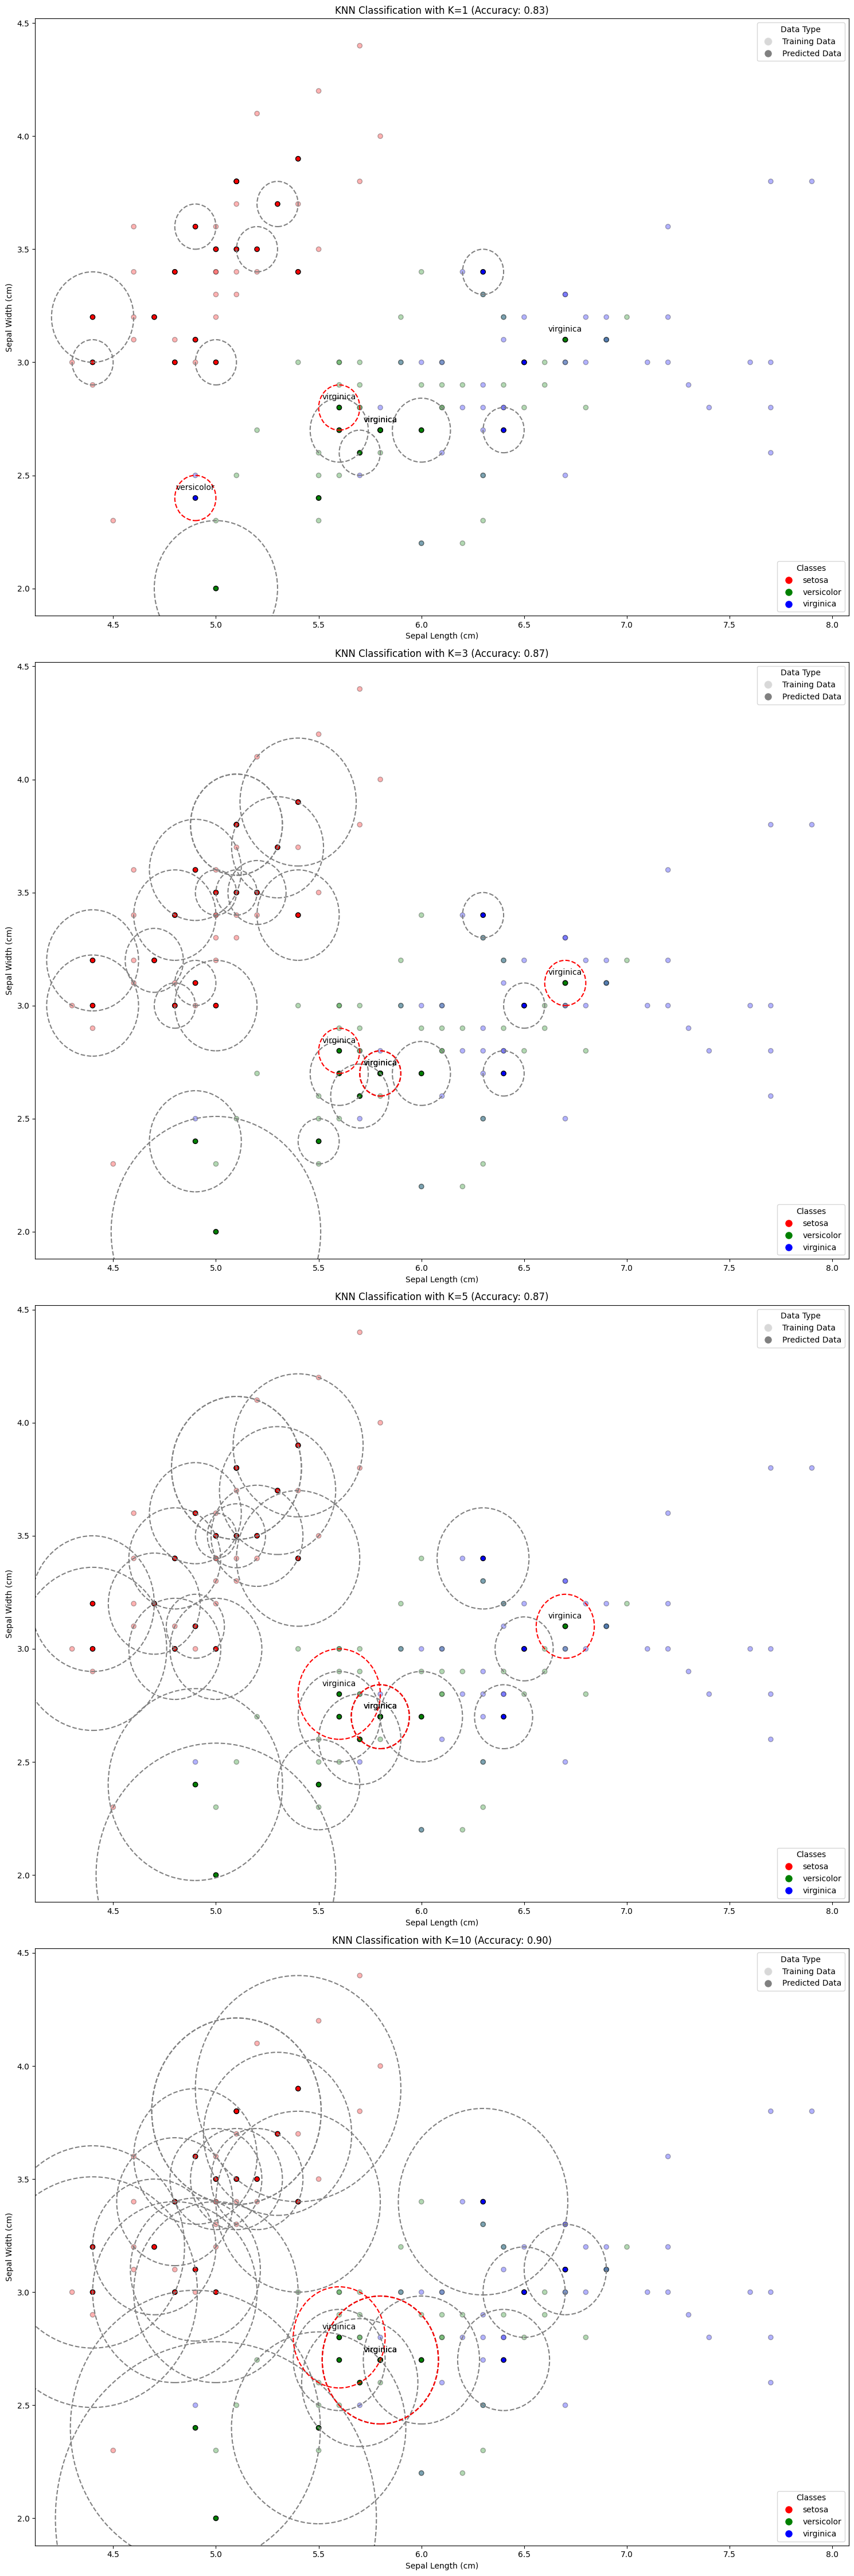

In [129]:
def calculate_accuracy(y_true, y_pred):
    y_true = np.array(y_true)
    y_pred = np.array(y_pred)
    if y_true.shape != y_pred.shape:
        raise ValueError("Shape of y_true and y_pred must be the same")
    return np.mean(y_true == y_pred)

# Definindo um mapeamento de cores para as classes
colors = ['red', 'green', 'blue']
class_names = iris.target_names  # ['setosa', 'versicolor', 'virginica']
color_map = ListedColormap(colors)

# Classificação dos dados de teste usando diferentes valores de K e plotagem dos resultados
k_values = [1, 3, 5, 10]
fig, axes = plt.subplots(len(k_values), 1, figsize=(15, 45))  # Uma coluna de gráficos

for i, k in enumerate(k_values):
    # Desempacotando corretamente os resultados de knn_classify
    results_k = [knn_classify(X_train, y_train, x_test, k) for x_test in X_test]
    predictions_k = [result[0] for result in results_k]  # Extrai apenas as previsões
    distances_k = [result[1] for result in results_k]    # Extrai as distâncias
    accuracy_k = calculate_accuracy(y_test, predictions_k)  # Calcula a precisão usando apenas as previsões

    # Plotagem dos dados de treino e de teste
    axes[i].scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=color_map, alpha=0.3, edgecolor='k', label='Training Data')
    scatter_test = axes[i].scatter(X_test[:, 0], X_test[:, 1], c=predictions_k, cmap=color_map, edgecolor='k', label='Predicted Data')

    # Desenhando círculos e anotações para previsões incorretas
    for point, actual, pred, dist in zip(X_test, y_test, predictions_k, distances_k):
        circle_color = 'red' if actual != pred else 'gray'  # Vermelho se incorreto, cinza se correto
        circle = plt.Circle(point, dist, color=circle_color, fill=False, linestyle='--', linewidth=1.5)
        axes[i].add_artist(circle)
        if actual != pred:
            axes[i].annotate(class_names[actual],  # Nome da classe verdadeira
                             (point[0], point[1]), 
                             textcoords="offset points",  # Como posicionar o texto
                             xytext=(0,10),  # Distância do texto ao ponto
                             ha='center',  # Alinhamento horizontal
                             color='black')  # Cor do texto

    # Configurando título, rótulos, e legendas
    axes[i].set_title(f'KNN Classification with K={k} (Accuracy: {accuracy_k:.2f})')
    axes[i].set_xlabel('Sepal Length (cm)')
    axes[i].set_ylabel('Sepal Width (cm)')

    # Legendas para treino e teste
    training_testing_legend = [Line2D([0], [0], marker='o', color='w', markerfacecolor='gray', markersize=10, alpha=0.3, label='Training Data'),
                               Line2D([0], [0], marker='o', color='w', markerfacecolor='gray', markersize=10, label='Predicted Data')]

    # Legendas para as classes
    class_legend = [Line2D([0], [0], marker='o', color='w', label=class_name,
                           markerfacecolor=col, markersize=10) for col, class_name in zip(colors, class_names)]
    
    # Adicionando as legendas ao gráfico
    legend1 = axes[i].legend(handles=training_testing_legend, loc='upper right', title="Data Type")
    axes[i].add_artist(legend1)
    axes[i].legend(handles=class_legend, loc='lower right', title="Classes")

fig.tight_layout()
plt.show()